# Telecom case study

# Read the data

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the data set
#pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

churn = pd.read_csv("telecom_churn_data.csv")
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

# understand the data

In [3]:
churn.shape

(99999, 226)

In [4]:
# summary
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [5]:
churn.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [6]:
#keep a copy of the data
tel_churn = churn.copy()

In [7]:
round(100*churn.isnull().sum()/len(churn),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

# Handling missing values(Data cleaning)

# 1.Imputing with zeros

In [8]:
# It is observed that the recharge date and the recharge value are missing together which means the customer didn't recharge

churn.loc[churn.total_rech_data_6.isnull() & churn.date_of_last_rech_data_6.isnull()&churn.total_rech_data_7.isnull() & churn.date_of_last_rech_data_7.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6","total_rech_data_7", "date_of_last_rech_data_7"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6,total_rech_data_7,date_of_last_rech_data_7
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN


In [9]:
# some recharge columns have minimum value of 1 while some don't.
#In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.
zero_imp_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'
                 ]

churn[zero_imp_cols] = churn[zero_imp_cols].apply(lambda x: x.fillna(0))


In [10]:
# check the missing vlues in the columns
churn[zero_imp_cols].isnull().sum()*100/len(churn)

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64

# 2. imputing categorical columns

In [11]:
#since FB_USER,night_pck_user are schemes provided they are considered as categorical columns

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

In [12]:
churn.night_pck_user_6.value_counts()

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

In [13]:
# 0 is already a scheme so replace missing values with '-1' in categorical columns where '-1' will be a new category
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))

In [14]:
#check the missing values imputed correctly
churn[cat_cols].isnull().sum()*100/len(churn)

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

In [15]:
churn.night_pck_user_6.value_counts()*100/len(churn)

-1.0    74.846748
 0.0    24.522245
 1.0     0.631006
Name: night_pck_user_6, dtype: float64

# 3.dropping the columns having more than  70% missing values

In [16]:
#Keeping only those whose missing values are less than 70%
churn = churn.loc[:,100*(churn.isnull().sum()/len(churn))<=70]

In [17]:
# Checking the shape of the dataset after removing missing values
churn.shape

(99999, 206)

In [18]:
# check the missing vlues in the columns
churn.isnull().sum()*100/len(churn)

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           3.937039
roam_og_mou_7           3.859039
roam_og_mou_8           5.378054
roam_og_mou_9           7.745077
loc_og_t2t_mou_6        3.937039
loc_og_t2t

# 4.Iterative imputer

In [19]:
# drop id and date columns as it is not needed for further process 
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
            ]
churn = churn.drop(id_cols + date_cols, axis=1)
churn.dtypes

loc_og_t2o_mou        float64
std_og_t2o_mou        float64
loc_ic_t2o_mou        float64
arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
onnet_mou_9           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
offnet_mou_9          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_ic_mou_9         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
roam_og_mou_9         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2m_mou_9      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f

In [20]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
#from sklearn.preprocessing import Imputer



In [21]:
churn_copy = churn.copy()
churn_cols = churn.columns

In [22]:
#initiating iterative imputer
ii = IterativeImputer()
telecom_churn = pd.DataFrame(ii.fit_transform(churn_copy))
telecom_churn.columns = churn_cols
telecom_churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-94.944679,-82.075492,0.00,-107.720912,143.85775,133.307335,0.00,113.61383,28.594379,11.993057,0.00,8.07321,33.241257,12.272498,0.00,1.491407,-99.939243,-117.342128,0.00,-120.152199,93.3071,91.377853,0.00,90.394593,3.782199,3.805738,0.00,3.701503,2.462554,-2.529567,0.00,-0.114994,-2.9355,-22.164315,0.00,-26.055549,30.772729,33.206769,0.00,33.901541,87.134907,90.597759,0.00,86.314472,1.207684,1.177248,0.00,1.073138,0.0,0.0,0.0,0.0,119.102695,124.992989,0.00,121.281348,-120.4364,-107.842035,0.0,-99.658877,3.910531,4.973079,0.00,4.404119,0.442875,0.048366,0.0,0.049522,0.00,0.00,0.00,0.00,-58.885368,-63.891655,0.16,-58.758126,107.484247,107.116035,4.13,106.17106,12.073462,12.593369,1.15,12.165616,60.595334,55.783499,5.44,59.573419,-23.061543,-23.207244,0.00,-22.243784,20.715453,21.652683,0.00,19.616795,2.161834,2.220285,0.00,2.175731,0.0,0.0,0.0,0.0,-0.189785,0.664232,0.00,-0.450986,0.00,0.00,5.44,0.00,-67.60446,-64.48414,0.0,-67.988371,7.07009,7.406376,0.0,8.014029,0.853764,1.01146,0.0,1.018064,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,25

In [23]:
# check the missing vlues in the columns
telecom_churn.isnull().sum()*100/len(churn)

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

# Data visulization for the feature which are useful for our analysis

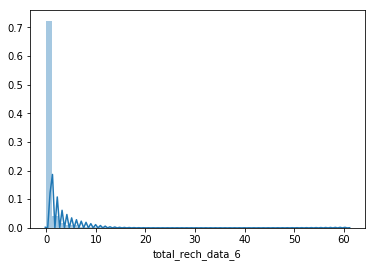

In [82]:
sns.distplot(telecom_churn['total_rech_data_6'])

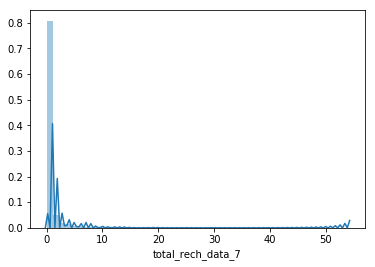

In [37]:
sns.distplot(telecom_churn['total_rech_data_7'])

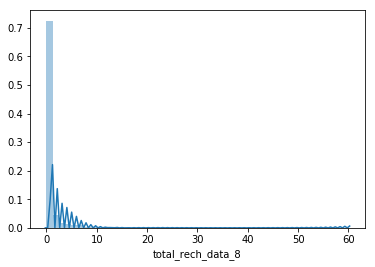

In [38]:
sns.distplot(telecom_churn['total_rech_data_8'])

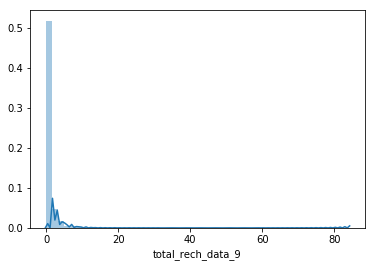

In [39]:
sns.distplot(telecom_churn['total_rech_data_9'])

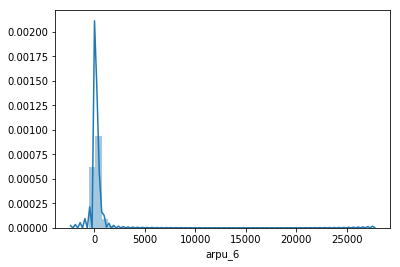

In [217]:
sns.distplot(telecom_churn['arpu_6'])

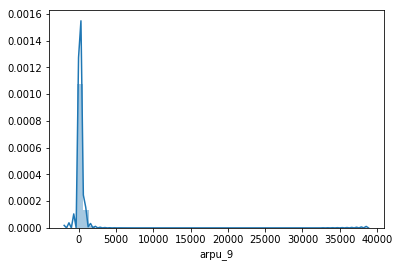

In [222]:
sns.distplot(telecom_churn['arpu_9'])

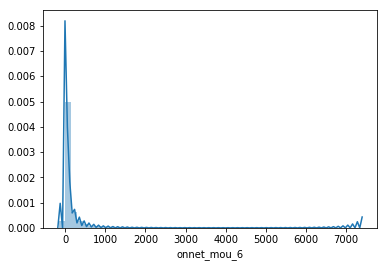

In [218]:
sns.distplot(telecom_churn['onnet_mou_6'])

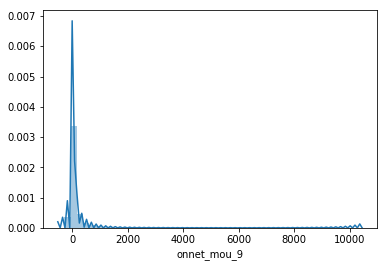

In [223]:
sns.distplot(telecom_churn['onnet_mou_9'])

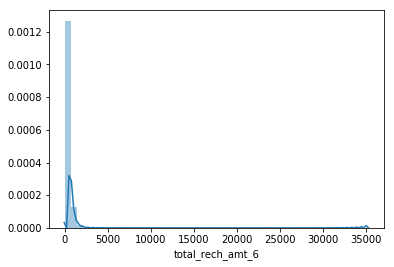

In [224]:
sns.distplot(telecom_churn['total_rech_amt_6'])

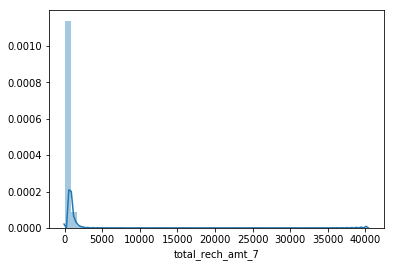

In [225]:
sns.distplot(telecom_churn['total_rech_amt_7'])

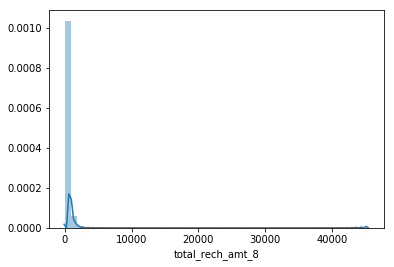

In [226]:
sns.distplot(telecom_churn['total_rech_amt_8'])

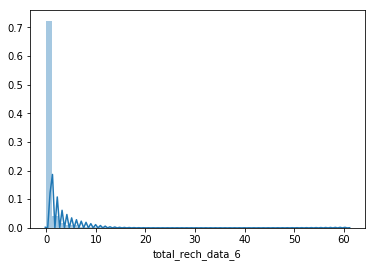

In [227]:
sns.distplot(telecom_churn['total_rech_data_6'])

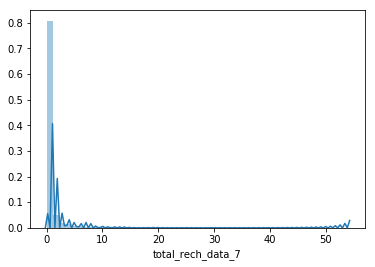

In [229]:
sns.distplot(telecom_churn['total_rech_data_7'])

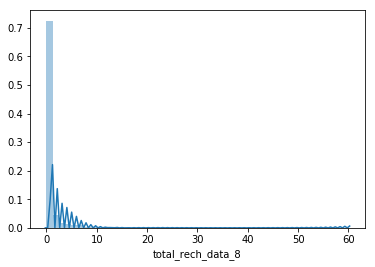

In [230]:
sns.distplot(telecom_churn['total_rech_data_8'])

# Filter high-value Customers(hvc)

# Calculate total  recharge amount for the good phase(6th and 7th month)

In [232]:
#Calculate total data recharge amount
# calculate the total data recharge amount for good phase-----number of recharges * average recharge amount
telecom_churn['total_data_rech_6'] = telecom_churn.total_rech_data_6 * telecom_churn.av_rech_amt_data_6
telecom_churn['total_data_rech_7'] = telecom_churn.total_rech_data_7 * telecom_churn.av_rech_amt_data_7

In [233]:
# calculate total recharge amount for good phase ---- call recharge amount + data recharge amount
telecom_churn['tot_amt_6'] = telecom_churn.total_rech_amt_6 + telecom_churn.total_data_rech_6
telecom_churn['tot_amt_7'] = telecom_churn.total_rech_amt_7 + telecom_churn.total_data_rech_7

In [234]:
# calculate average recharge done by customer in good phase 
telecom_churn['avg_amt_6_7'] = (telecom_churn.tot_amt_6 + telecom_churn.tot_amt_7)/2

In [235]:
# lThe 70th percentile of the total recharge amount
cut_off = (telecom_churn.avg_amt_6_7.quantile(0.7))
cut_off

478.0

In [236]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_hvc = telecom_churn.loc[telecom_churn.avg_amt_6_7 >= cut_off, :]
churn_hvc.shape

(30001, 201)

In [237]:
# delete variables created to filter high-value customers
churn_hvc = churn_hvc.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'av_rech_amt_data_6', 'av_rech_amt_data_6'], axis=1)
churn_hvc.shape

(30001, 198)

# Derive Churn
# 9th Month is our Churn Phase. Usage-based churn


In [238]:
# 3.create churn variable: those who have not used either calls or internet in the month of September(month9) are customers who have churned

# 0 - not churn, 1 - chur n
#churn_hvc['churn'] = churn_hvc.apply(lambda x: 1 if (x.total_calls_mou_9 == 0 and x.total_internet_mb_9 == 0) else 0, axis=1)

In [239]:
#4.Check Churn percentage
#churn_hvc.value_counts*100/churn_hvc.shape[0]

In [240]:
#5.Delete columns that belong to the churn month

#churn_hvc = churn_hvc.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [241]:
#1.Calculate total incoming and outgoing minutes of usage
# calculate 2g and 3g data consumption
churn_hvc['Total Call Usages'] = churn_hvc['total_ic_mou_9'] + churn_hvc['total_og_mou_9']
churn_hvc['Total Data Usages'] = churn_hvc['vol_3g_mb_9'] + churn_hvc['vol_2g_mb_9']

In [242]:
churn_hvc['Total Usages'] = churn_hvc['Total Call Usages'] + churn_hvc['Total Data Usages']

In [1]:
#churn_hvc['Total Usages'].value_counts()*100/churn_hvc.shape[0]

In [244]:
# 3.create churn variable: those who have not used either calls or internet in the month of September(month9) are customers who have churned

# 0 - not churn, 1 - chur n
churn_hvc['Churn'] = 0
churn_hvc.loc[(churn_hvc['Total Usages'] == 0), 'Churn'] = 1
churn_hvc.loc[(churn_hvc['Total Usages'] != 0), 'Churn'] = 0



In [245]:
#4.Check Churn percentage
churn_hvc['Churn'].value_counts()*100/len(churn_hvc)

0    91.863605
1     8.136395
Name: Churn, dtype: float64

In [246]:
#5.Delete columns that belong to the churn month
churn_hvc = churn_hvc[churn_hvc.columns.drop(list(churn_hvc.filter(regex='_9')))]

In [247]:
print("Data Imbalance of the telecome dataframe is : ", (sum(churn_hvc['Churn']) / len(churn_hvc['Churn']))*100)

Data Imbalance of the telecome dataframe is :  8.136395453484884


# Data visulasition on the features for churn or non-churn data

Text(0.5, 1.0, 'Imbalance on Churn ')

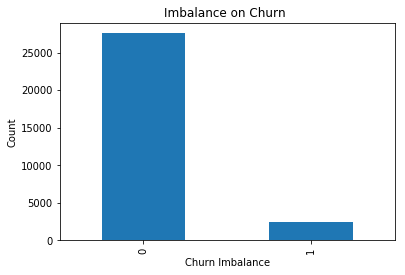

In [248]:
churn_hvc['Churn'].value_counts().plot.bar()

plt.xlabel('Churn Imbalance')
plt.ylabel('Count')
plt.title('Imbalance on Churn ')

Text(0.5, 1.0, 'Non-Churn')

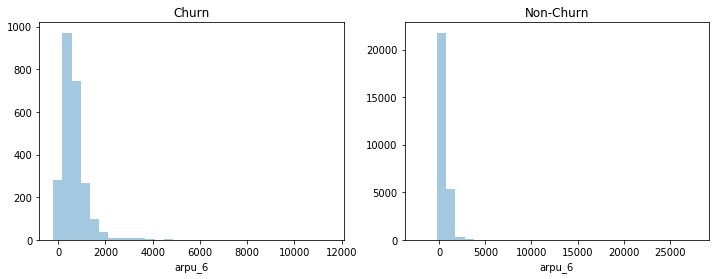

In [249]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(churn_hvc[churn_hvc['Churn']==1].arpu_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(churn_hvc[churn_hvc['Churn']==0].arpu_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

Text(0.5, 1.0, 'Non-Churn')

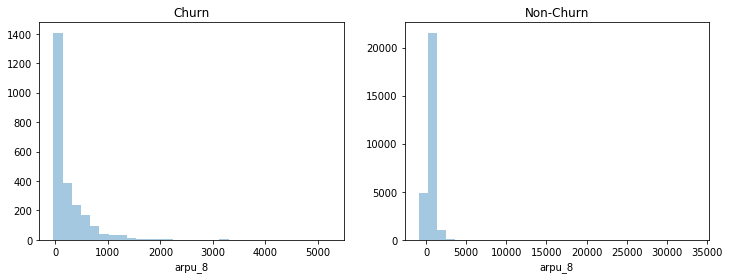

In [250]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(churn_hvc[churn_hvc['Churn']==1].arpu_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(churn_hvc[churn_hvc['Churn']==0].arpu_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

Text(0.5, 1.0, 'Non-Churn')

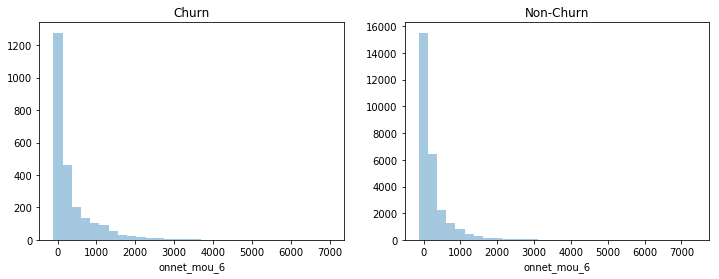

In [251]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(churn_hvc[churn_hvc['Churn']==1].onnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(churn_hvc[churn_hvc['Churn']==0].onnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

Text(0.5, 1.0, 'Non-Churn')

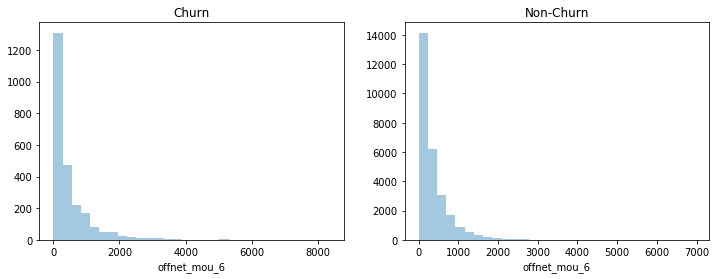

In [252]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(churn_hvc[churn_hvc['Churn']==1].offnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(churn_hvc[churn_hvc['Churn']==0].offnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

Text(0.5, 1.0, 'Non-Churn')

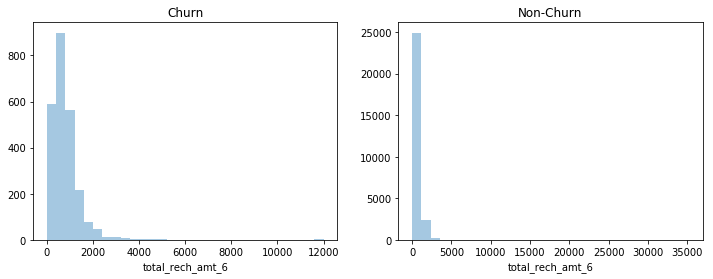

In [253]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(churn_hvc[churn_hvc['Churn']==1].total_rech_amt_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(churn_hvc[churn_hvc['Churn']==0].total_rech_amt_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

Text(0.5, 1.0, 'Non-Churn')

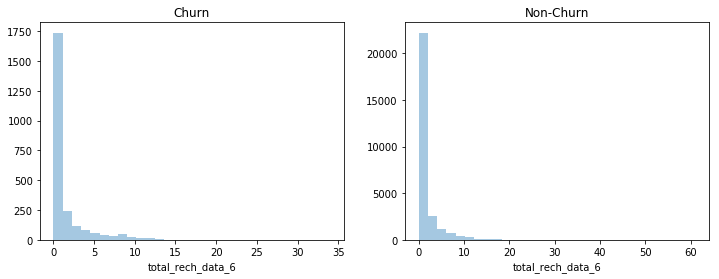

In [254]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(churn_hvc[churn_hvc['Churn']==1].total_rech_data_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(churn_hvc[churn_hvc['Churn']==0].total_rech_data_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

# Derive some additional variable

In [255]:
# The difference in the data usage or recharge from the good phase to active phase can be used as derived variables
churn_hvc['total_rech_amt_diff'] = churn_hvc.total_rech_amt_8 - ((churn_hvc.total_rech_amt_6 + churn_hvc.total_rech_amt_7)/2)
churn_hvc['total_rech_data_diff'] = churn_hvc.total_rech_data_8 - ((churn_hvc.total_rech_data_6 + churn_hvc.total_rech_data_7)/2)


In [256]:
churn_hvc.shape

(30001, 157)

# Outlier treatment

# Boxplots for outliers

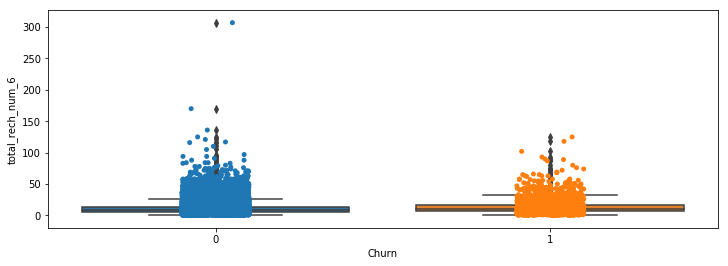

In [257]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='Churn', y='total_rech_num_6', data=churn_hvc)
sns.stripplot(x='Churn', y='total_rech_num_6', data=churn_hvc, jitter=True, edgecolor="gray")

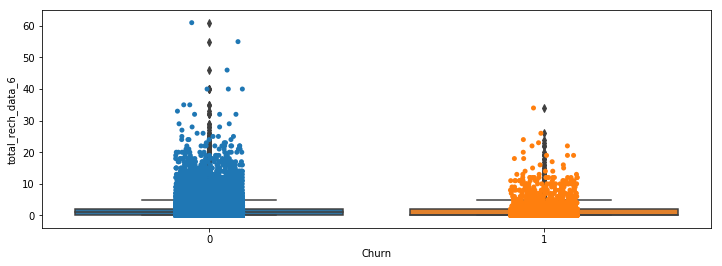

In [259]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='Churn', y='total_rech_data_6', data=churn_hvc)
sns.stripplot(x='Churn', y='total_rech_data_6', data=churn_hvc, jitter=True, edgecolor="gray")

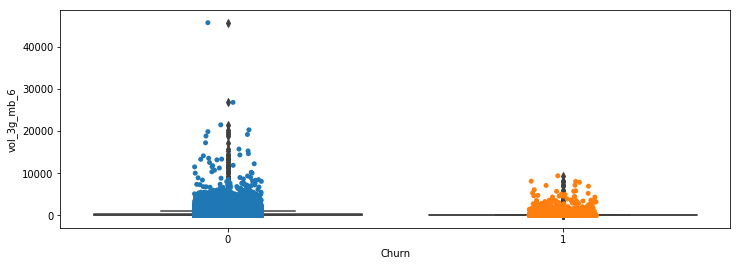

In [260]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='Churn', y='vol_3g_mb_6', data=churn_hvc)
sns.stripplot(x='Churn', y='vol_3g_mb_6', data=churn_hvc, jitter=True, edgecolor="gray")

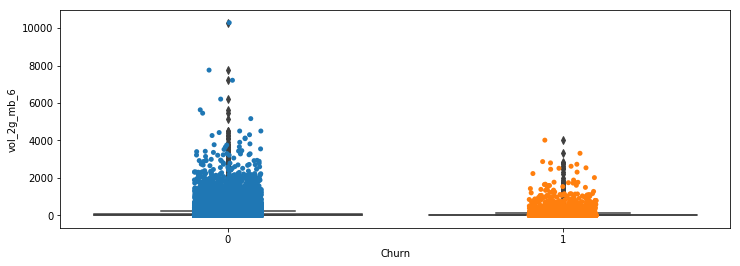

In [261]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='Churn', y='vol_2g_mb_6', data=churn_hvc)
sns.stripplot(x='Churn', y='vol_2g_mb_6', data=churn_hvc, jitter=True, edgecolor="gray")

In [262]:
# for outlier, we are capping the cloumns values to .01% and .99% depending upon their values
for col in churn_hvc.columns:
    percentiles = churn_hvc[col].quantile([0.01,0.99]).values
    churn_hvc[col][churn_hvc[col] <= percentiles[0]] = percentiles[0]
    churn_hvc[col][churn_hvc[col] >= percentiles[1]] = percentiles[1]

In [263]:
churn_hvc.shape

(30001, 157)

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
#from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Train Test split

In [265]:
# divide data into train and test
X = churn_hvc.drop("Churn", axis = 1)
y = churn_hvc.Churn


In [266]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)




# PCA

# feature scaling

In [267]:
Scalling the features by standerd scaler 
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train)
X_test_pca = scaler.transform(X_test)

In [268]:
X_train_pca.max()

7.44092583811764

In [269]:
#importing the PCA module
from sklearn .decomposition import PCA
pca = PCA(svd_solver = 'randomized',random_state =42)

In [270]:
pca.fit(X_train_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [271]:
pca.components_

array([[-7.61438792e-17, -0.00000000e+00,  1.11022302e-16, ...,
         6.94700972e-02,  2.36747982e-03,  3.37550685e-02],
       [-6.50785694e-17,  0.00000000e+00, -1.11022302e-16, ...,
         1.34643980e-01,  4.64712619e-02,  1.43124221e-02],
       [ 4.90435298e-18,  1.90819582e-16,  2.77555756e-17, ...,
         1.32221347e-01,  4.30994839e-02,  1.76418069e-02],
       ...,
       [ 0.00000000e+00,  4.16076174e-02, -4.85703900e-01, ...,
         2.42861287e-16, -1.45716772e-16,  4.77048956e-18],
       [ 0.00000000e+00, -2.81458478e-01,  3.54053254e-01, ...,
         3.33066907e-16,  3.01841885e-16,  1.61329283e-16],
       [ 9.99999447e-01,  4.55931245e-04, -2.52672485e-04, ...,
         1.92948684e-15, -3.29678776e-16,  1.44658997e-15]])

In [272]:
#variance explained by the first principal components
pca.explained_variance_ratio_

array([1.27773530e-01, 1.03590604e-01, 6.63015605e-02, 5.23304514e-02,
       4.11524747e-02, 3.51506457e-02, 2.95136085e-02, 2.81917222e-02,
       2.53266519e-02, 2.38479723e-02, 2.13400475e-02, 1.95831810e-02,
       1.88158536e-02, 1.83333127e-02, 1.63702740e-02, 1.60455250e-02,
       1.46482913e-02, 1.44841452e-02, 1.33577527e-02, 1.24226578e-02,
       1.12203913e-02, 1.04438151e-02, 9.72078818e-03, 9.44457003e-03,
       9.28594911e-03, 8.80737515e-03, 8.59993480e-03, 8.15010129e-03,
       7.71911155e-03, 7.31657222e-03, 7.20730888e-03, 7.07537635e-03,
       6.71713478e-03, 6.61679166e-03, 6.07144707e-03, 6.03560130e-03,
       5.76237780e-03, 5.69561628e-03, 5.54835670e-03, 5.37286008e-03,
       5.23566205e-03, 5.05488615e-03, 4.73081894e-03, 4.63132433e-03,
       4.59813995e-03, 4.47045512e-03, 4.27068995e-03, 4.02386873e-03,
       3.95182294e-03, 3.86857410e-03, 3.73474760e-03, 3.51133306e-03,
       3.44502705e-03, 3.24177753e-03, 3.17069231e-03, 3.07054551e-03,
      

In [273]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.12777353, 0.23136413, 0.29766569, 0.34999615, 0.39114862,
       0.42629927, 0.45581287, 0.4840046 , 0.50933125, 0.53317922,
       0.55451927, 0.57410245, 0.5929183 , 0.61125162, 0.62762189,
       0.64366741, 0.65831571, 0.67279985, 0.6861576 , 0.69858026,
       0.70980065, 0.72024447, 0.72996526, 0.73940983, 0.74869578,
       0.75750315, 0.76610309, 0.77425319, 0.7819723 , 0.78928887,
       0.79649618, 0.80357156, 0.81028869, 0.81690548, 0.82297693,
       0.82901253, 0.83477491, 0.84047052, 0.84601888, 0.85139174,
       0.8566274 , 0.86168229, 0.86641311, 0.87104443, 0.87564257,
       0.88011303, 0.88438372, 0.88840759, 0.89235941, 0.89622798,
       0.89996273, 0.90347406, 0.90691909, 0.91016087, 0.91333156,
       0.91640211, 0.91937411, 0.92232999, 0.92503502, 0.92758983,
       0.93013192, 0.93259639, 0.9350277 , 0.93741673, 0.93972222,
       0.94192442, 0.94407618, 0.94619956, 0.94830417, 0.95035582,
       0.95239899, 0.95438005, 0.95632457, 0.95823609, 0.96008

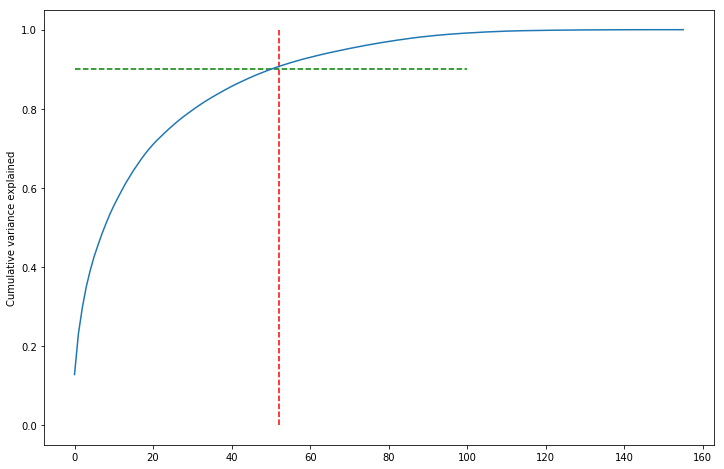

In [274]:
# plotting the scree plot
fig = plt.figure(figsize=[12,8])
plt.vlines(x=52, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [275]:
# dimensionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=52)

In [276]:
df_train_pca = pca_final.fit_transform(X_train_pca)
df_train_pca.shape

(21000, 52)

In [277]:
df_train_pca[:10]

array([[ 1.13880545e+00, -9.87267220e-01, -1.92432120e+00,
        -2.51959260e+00,  1.55748378e+00,  1.28694804e+00,
        -1.30719701e+00, -3.93260233e+00, -1.05231434e+00,
         7.24791474e-01, -1.79137308e+00, -3.24702532e+00,
         5.57335210e+00,  1.30058454e+00,  1.82364141e-01,
        -8.84394244e-01, -1.17855028e+00, -4.20237816e-01,
        -2.51217832e+00,  3.96639934e-01,  1.30832204e+00,
         3.63141636e-01,  8.83512676e-01,  1.43081561e+00,
         5.40336117e-01, -3.50863375e+00,  1.53113801e+00,
         3.16499743e-01, -9.16798539e-01,  3.92310602e-01,
        -1.37525841e+00, -1.30045664e-01,  2.32939015e-01,
         3.17942256e-01, -7.06590154e-01, -6.70234998e-01,
         8.42756458e-01,  1.36163230e+00,  1.11478008e+00,
         9.48826100e-02,  2.10185294e-01,  1.19008950e+00,
         1.41481721e-03, -1.28614666e-01,  1.25643730e+00,
         3.99661396e-01,  5.83045693e-01,  4.58644927e-02,
         2.25388119e-01,  1.15428451e-01, -9.05987133e-0

In [278]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

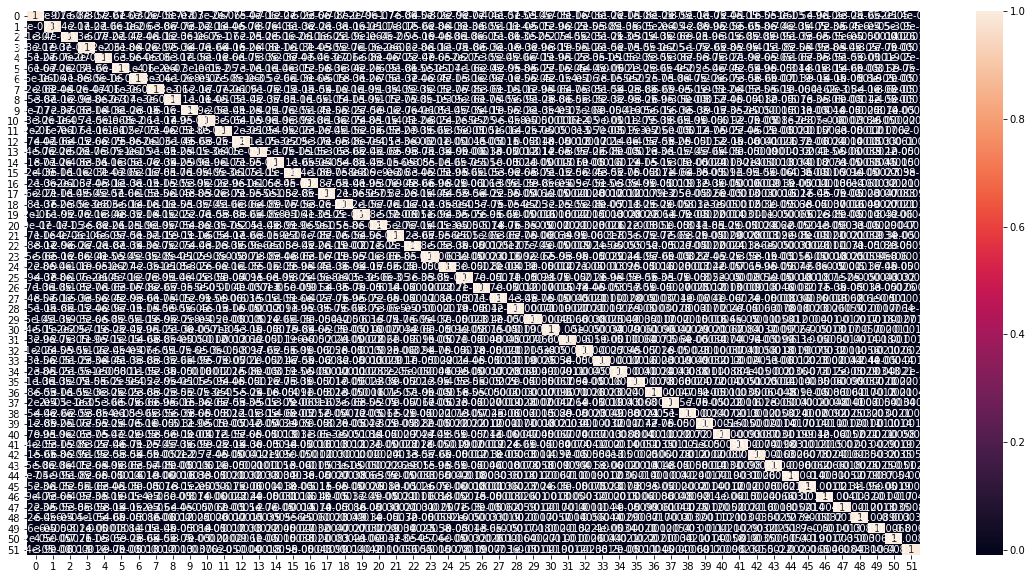

In [279]:
#plotting the correlation matrix to see the correlation between the columns
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [280]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.008677432106877145 , min corr:  -0.008904877142676218


In [281]:
#Applying selected components to the test data
df_test_pca = pca_final.transform(X_test_pca)
df_test_pca.shape

(9001, 52)

# Model 1 Logistic Regression



In [282]:
logreg = LogisticRegression() 
logreg.fit(df_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [283]:
y_pred = logreg.predict(df_test_pca)

In [284]:
print("Accuracy:{:2.2}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity:{:2.2}".format(metrics.recall_score(y_test, y_pred)))
print("Roc:{:2.2}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy:0.96
Sensitivity:0.69
Roc:0.84


# Model 2 Regularized model

In [285]:
# lasso regression
logreg = LogisticRegression(penalty ='l1',solver ='saga',class_weight = {1:0.92,0:0.08})
logreg.fit(df_train_pca,y_train)

LogisticRegression(C=1.0, class_weight={0: 0.08, 1: 0.92}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [286]:
y_pred = logreg.predict(df_test_pca)

In [287]:
print("Accuracy:{:2.2}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity:{:2.2}".format(metrics.recall_score(y_test, y_pred)))
print("Roc:{:2.2}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy:0.92
Sensitivity:0.97
Roc:0.94


In [288]:
#ridge regression
# control the regularization parameter
#low c- high regularization
#high c- low regularization

logreg = LogisticRegression(penalty ='l2',solver ='saga',class_weight = {1:0.92,0:0.08},C =0.1 )
logreg.fit(df_train_pca,y_train)
y_pred = logreg.predict(df_test_pca)
print("Accuracy:{:2.2}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity:{:2.2}".format(metrics.recall_score(y_test, y_pred)))
print("Roc:{:2.2}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy:0.92
Sensitivity:0.97
Roc:0.94


In [289]:
#run GridSearch for C= 0.0001,0.001,0.002,0.005,0.1,0.2,0.3,0.4,0.5,1,2,penalty=[l1,l2] and class_weight = {1:0.92,0:0.08}
params = {'C':[0.0001,0.001,0.002,0.005,0.1,0.2,0.3,0.4,0.5,1,2], 'penalty':['l1','l2'],'class_weight':[{1:0.92,0:0.08},'balanced']}
algo = LogisticRegression()
model = GridSearchCV(estimator = algo, param_grid = params, scoring = 'recall')
model.fit(df_train_pca,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.002, 0.005, 0.1, 0.2, 0.3, 0.4,
                               0.5, 1, 2],
                         'class_weight': [{0: 0.08, 1: 0.92}, 'balanced'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='re

In [290]:
model.best_score_

0.9710163900089019

In [291]:
model.best_params_

{'C': 0.4, 'class_weight': {1: 0.92, 0: 0.08}, 'penalty': 'l2'}

In [292]:
logreg = LogisticRegression(penalty ='l2',solver ='saga',class_weight = '{1: 0.92, 0: 0.08}',C =0.4 )
logreg.fit(df_train_pca,y_train)
y_pred = logreg.predict(df_test_pca)
print("Accuracy:{:2.2}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity:{:2.2}".format(metrics.recall_score(y_test, y_pred)))
print("Roc:{:2.2}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy:0.96
Sensitivity:0.66
Roc:0.82


# Random Forest

In [293]:
# Now we will perform random forest technique
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(df_train_pca,y_train)

y_pred = rf_model.predict(df_test_pca)
#Checking the accuracy and sensitivity
print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(metrics.recall_score(y_test, y_pred)))

Accuracy 0.9412287523608488
Sensitivity 0.36533333333333334


In [121]:
# Now we will be running grid search again on random forest 
from sklearn.model_selection import GridSearchCV

param = {'criterion' : ['gini', 'entropy'], 'min_samples_leaf' : [1,5,10], 'min_samples_split' : [2,4,10], 'n_estimators' : [50,100,400], 'class_weight' : [{1:0.915,0:0.0845},'balanced']}
forest = RandomForestClassifier()

#Creating grid search object
forestModel = GridSearchCV(estimator = forest, cv = 5, param_grid = param, scoring = 'recall', return_train_score = True)
forestModel.fit(df_train_pca, y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [123]:
forestModel.best_score_

0.5759857569251715

In [124]:
forestModel.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 50}

In [134]:
#Fitting the model 9th by random forest by using the best parameter
rf_model = RandomForestClassifier(class_weight = 'balanced', criterion = 'gini', min_samples_leaf = 10, min_samples_split = 10, n_estimators = 50)
rf_model.fit(df_train_pca,y_train)

y_pred = rf_model.predict(X_train)
#Checking the accuracy and sensitivity
print("Accuracy {}".format(metrics.accuracy_score(y_train, y_pred)))
print("Sensitivity {}".format(metrics.recall_score(y_train, y_pred)))

Accuracy 1.0
Sensitivity 1.0


In [ ]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={1: 0.92, 0: 0.08}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit
#rfc.fit(df_train_pca,y_train)

In [ ]:
# fit model
#model.fit(df_train_pca,y_train)

In [ ]:
# print best hyperparameters
#print("Best AUC: ", model.best_score_)
#print("Best hyperparameters: ", model.best_params_)

In [ ]:
# predict churn on test data
#y_pred = model.predict(df_test_pca)

# create onfusion matrix
#cm = confusion_matrix(y_test, y_pred)
#print(cm)

# check sensitivity and specificity
#sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
#print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
#y_pred_prob = model.predict_proba(df_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

# Model interpretable form(without pca)

In [297]:
churn_hvc.shape

(30001, 157)

In [298]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
churn_hvc1 = churn_hvc.describe(percentiles=[.25, .5, .75, .90, .95, .99])

In [299]:
df = churn_hvc[churn_hvc1.columns]

In [300]:
normalized_df=(df-df.mean())/df.std()
churn_hvc_new = churn_hvc.drop(churn_hvc1.columns, 1)
churn_hvc_new1 = pd.concat([churn_hvc_new,normalized_df],axis=1)


In [301]:
# divide data into train and test
X = churn_hvc.drop("Churn", axis = 1)
y = churn_hvc.Churn



In [302]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)


In [187]:
#importing stats model 
import statsmodels.api as sm

In [303]:
# Building model 1
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20852
Model Family:                Binomial   Df Model:                          147
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 15 Mar 2020   Deviance:                          nan
Time:                        20:18:07   Pearson chi2:                 5.05e+18
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.793e+14   2.97e+06  -1.28e+08      0.000   -3.79e+14   -3.79e+14
loc_og_t2o_mou        3.144e+04      0.001   4.18e+07      0.000    3.14e+04    3.14e+04
std_og_t2o_mou        2756.5115      0.000   6.08e+06      0.000    2756.511    2756.512
loc_ic_t2o_mou       -5.323e+04      0.001  -3.84e+07      0.000   -5.32e+04   -5.32e+04
arpu_6               -2.317e+09   4831.026   -4.8e+05      0.000   -2.32e+09   -2.32e+09
arpu_7               -4.721e+10   4938.810  -9.56e+06      0.000   -4.72e+10   -4.72e+10
arpu_8                1.233e+11   4916.286   2.51e+07      0.000    1.23e+11    1.23e+11
onnet_mou_6          -1.164e+10    1.1e+04  -1.06e+06      0.000   -1.16e+10   -1.16e+10
onnet_mou_7           3.808e+10   1.24e+04   3.06e+06      0.000    3.81e+10    3.81e+10
onnet_mou_8          -1.207e+11   1.19e+04  -1.01e+07      0.000   -1.21e+11   -1.21e+11
offnet_mou_6          1.461e+11   9654.423   1.51e+07      0.000    1.46e+11    1.46e+11
offnet_mou_7         -5.072e+09   1.11e+04  -4.55e+05      0.000   -5.07e+09   -5.07e+09
offnet_mou_8         -2.279e+11   1.08e+04  -2.11e+07      0.000   -2.28e+11   -2.28e+11
roam_ic_mou_6         3.636e+11   1.65e+04   2.21e+07      0.000    3.64e+11    3.64e+11
roam_ic_mou_7        -6.683e+11   2.35e+04  -2.85e+07      0.000   -6.68e+11   -6.68e+11
roam_ic_mou_8        -3.434e+11   2.22e+04  -1.55e+07      0.000   -3.43e+11   -3.43e+11
roam_og_mou_6        -6.582e+11   1.51e+04  -4.36e+07      0.000   -6.58e+11   -6.58e+11
roam_og_mou_7         7.486e+11   1.87e+04      4e+07      0.000    7.49e+11    7.49e+11
roam_og_mou_8         6.608e+11   1.83e+04    3.6e+07      0.000    6.61e+11    6.61e+11
loc_og_t2t_mou_6      4.769e+11   1.55e+04   3.08e+07      0.000    4.77e+11    4.77e+11
loc_og_t2t_mou_7      -4.64e+11   1.75e+04  -2.66e+07      0.000   -4.64e+11   -4.64e+11
loc_og_t2t_mou_8      2.138e+12   1.73e+04   1.24e+08      0.000    2.14e+12    2.14e+12
loc_og_t2m_mou_6     -1.464e+11   1.37e+04  -1.07e+07      0.000   -1.46e+11   -1.46e+11
loc_og_t2m_mou_7     -3.032e+11   1.59e+04   -1.9e+07      0.000   -3.03e+11   -3.03e+11
loc_og_t2m_mou_8      1.928e+12   1.58e+04   1.22e+08      0.000    1.93e+12    1.93e+12
loc_og_t2f_mou_6       -6.4e+11   6.15e+04  -1.04e+07      0.000    -6.4e+11    -6.4e+11
loc_og_t2f_mou_7     -1.434e+12   6.58e+04  -2.18e+07      0.000   -1.43e+12   -1.43e+12
loc_og_t2f_mou_8      6.604e+12   6.55e+04   1.01e+08      0.000     6.6e+12     6.6e+12
loc_og_t2c_mou_6     -3.945e+12   1.48e+05  -2.67e+07      0.000   -3.94e+12   -3.94e+12
loc_og_t2c_mou_7     -2.781e+12   1.44e+05  -1.93e+07      0.000   -2.78e+12   -2.78e+12
loc_og_t2c_mou_8      5.254e+12   1.46e+05   3.61e+07      0.000    5.25e+12    5.25e+12
loc_og_mou_6         -1.777e+11   1.58e+04  -1.13e+07      0.000   -1.78e+11   -1.78e+11
loc_og_mou_7          2.742e+11   1.69e+04   1.

In [304]:

logreg = LogisticRegression()

rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [307]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [309]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 144),
 ('std_og_t2o_mou', False, 143),
 ('loc_ic_t2o_mou', False, 142),
 ('arpu_6', False, 87),
 ('arpu_7', False, 81),
 ('arpu_8', False, 118),
 ('onnet_mou_6', False, 107),
 ('onnet_mou_7', False, 53),
 ('onnet_mou_8', False, 126),
 ('offnet_mou_6', False, 68),
 ('offnet_mou_7', False, 46),
 ('offnet_mou_8', False, 75),
 ('roam_ic_mou_6', False, 93),
 ('roam_ic_mou_7', False, 122),
 ('roam_ic_mou_8', False, 67),
 ('roam_og_mou_6', False, 86),
 ('roam_og_mou_7', False, 76),
 ('roam_og_mou_8', False, 56),
 ('loc_og_t2t_mou_6', False, 20),
 ('loc_og_t2t_mou_7', False, 5),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 69),
 ('loc_og_t2m_mou_7', False, 8),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 82),
 ('loc_og_t2f_mou_7', False, 71),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 23),
 ('loc_og_t2c_mou_7', False, 103),
 ('loc_og_t2c_mou_8', False, 62),
 ('loc_og_mou_6', False, 100),
 ('loc_og_mou_7', False, 6),
 

In [310]:
# Creating a list of columns which we will be using for our model creation that we got it from RFE
col = X_train.columns[rfe.support_]
col

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_mou_8', 'std_og_t2f_mou_7', 'total_rech_data_8',
       'night_pck_user_8', 'sachet_2g_8', 'sachet_3g_6', 'fb_user_8',
       'Total Call Usages', 'Total Data Usages', 'Total Usages'],
      dtype='object')

In [311]:
# columns which we are not considering for our model creation
list(X_train.columns[~rfe.support_])

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og

In [312]:
# Creating X_test dataframe with RFE selected variables
X_train_new = X_train[col]
X_test_new = X_test[col]

In [313]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train_new, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [314]:
#Checking the predictive output
y_pred = logsk.predict(X_test_new)

#Checking the accuracy and sensitivity
print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(metrics.recall_score(y_test, y_pred)))

Accuracy 0.9997778024663926
Sensitivity 1.0


In [315]:
# Logistic regression model
# First iteration
logm2 = sm.GLM(y_train,(sm.add_constant(X_train_new)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 15 Mar 2020   Deviance:                          nan
Time:                        20:22:15   Pearson chi2:                 4.97e+18
No. Iterations:                   100   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.079e+14   1.73e+06   2.36e+08      0.000    4.08e+14    4.08e+14
loc_og_t2t_mou_8  -2.716e+12   1.12e+04  -2.43e+08      0.000   -2.72e+12   -2.72e+12
loc_og_t2m_mou_8  -2.614e+11   9648.216  -2.71e+07      0.000   -2.61e+11   -2.61e+11
loc_og_t2f_mou_8   1.081e+12   3.94e+04   2.74e+07      0.000    1.08e+12    1.08e+12
loc_og_mou_8       8.726e+11   9183.037    9.5e+07      0.000    8.73e+11    8.73e+11
std_og_t2f_mou_7  -6.576e+09   8.94e+04  -7.35e+04      0.000   -6.58e+09   -6.58e+09
total_rech_data_8  1.887e+13   6.19e+05   3.05e+07      0.000    1.89e+13    1.89e+13
night_pck_user_8   3.315e+14   3.06e+06   1.08e+08      0.000    3.32e+14    3.32e+14
sachet_2g_8       -2.814e+13   6.08e+05  -4.63e+07      0.000   -2.81e+13   -2.81e+13
sachet_3g_6        7.561e+12   8.56e+05   8.83e+06      0.000    7.56e+12    7.56e+12
fb_user_8         -3.463e+14   1.66e+06  -2.09e+08      0.000   -3.46e+14   -3.46e+14
Total Call Usages -4.338e+12   3407.874  -1.27e+09      0.000   -4.34e+12   -4.34e+12
Total Data Usages -2.617e+12   3400.955   -7.7e+08      0.000   -2.62e+12   -2.62e+12
Total Usages       1.571e+12   3228.682   4.87e+08      0.000    1.57e+12    1.57e+12
=====================================================================================
"""

In [316]:
# Calculate the VIFs for the new model, 
# VIF is also part of selecting variables what all features we need to keep to get the best model
# A feature having greater than 5 vif, can not be part of our model as it shows that it is correlated with some other 
# variable and redundent, so we need to remove these variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Total Usages,125.64
10,Total Call Usages,62.40
3,loc_og_mou_8,58.33
11,Total Data Usages,41.32
1,loc_og_t2m_mou_8,27.51
5,total_rech_data_8,15.59
0,loc_og_t2t_mou_8,14.00
7,sachet_2g_8,10.99
9,fb_user_8,5.42
6,night_pck_user_8,4.90


In [317]:
# p-value is still fine for all the remaining feature only VIF is high, so now for iteration we will remove 'total_rech_data_8'.
# Removing 'total_rech_data_8' as it has high vif values
X_train_new = X_train_new.drop(["Total Usages"], axis = 1)

In [318]:
# Logistic regression model
# second iteration
logm2 = sm.GLM(y_train,(sm.add_constant(X_train_new)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 15 Mar 2020   Deviance:                          nan
Time:                        20:22:41   Pearson chi2:                 8.27e+18
No. Iterations:                   100   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.764e+14   1.73e+06   3.91e+08      0.000    6.76e+14    6.76e+14
loc_og_t2t_mou_8  -3.265e+12   1.12e+04  -2.93e+08      0.000   -3.26e+12   -3.26e+12
loc_og_t2m_mou_8  -6.903e+11   9627.153  -7.17e+07      0.000    -6.9e+11    -6.9e+11
loc_og_t2f_mou_8    7.24e+11   3.94e+04   1.84e+07      0.000    7.24e+11    7.24e+11
loc_og_mou_8       1.309e+12   9170.308   1.43e+08      0.000    1.31e+12    1.31e+12
std_og_t2f_mou_7   4.102e+11   8.94e+04   4.59e+06      0.000     4.1e+11     4.1e+11
total_rech_data_8  1.175e+13   6.19e+05    1.9e+07      0.000    1.17e+13    1.17e+13
night_pck_user_8   3.463e+14   3.06e+06   1.13e+08      0.000    3.46e+14    3.46e+14
sachet_2g_8       -3.032e+13   6.07e+05  -4.99e+07      0.000   -3.03e+13   -3.03e+13
sachet_3g_6        4.573e+13   8.56e+05   5.34e+07      0.000    4.57e+13    4.57e+13
fb_user_8         -4.357e+14   1.66e+06  -2.63e+08      0.000   -4.36e+14   -4.36e+14
Total Call Usages -2.944e+12    718.178   -4.1e+09      0.000   -2.94e+12   -2.94e+12
Total Data Usages -1.038e+12    743.055   -1.4e+09      0.000   -1.04e+12   -1.04e+12
=====================================================================================
"""

In [319]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_og_mou_8,58.17
1,loc_og_t2m_mou_8,27.39
5,total_rech_data_8,15.59
0,loc_og_t2t_mou_8,13.97
7,sachet_2g_8,10.99
9,fb_user_8,5.41
6,night_pck_user_8,4.88
10,Total Call Usages,2.57
11,Total Data Usages,1.96
2,loc_og_t2f_mou_8,1.42


In [321]:
# p-value is still fine for all the remaining feature only VIF is high, so now for iteration we will remove 'total_rech_data_8'.
# Removing 'total_rech_data_8' as it has high vif values
X_train_new = X_train_new.drop(["loc_og_mou_8"], axis = 1)

In [153]:
# Logistic regression model
# third iteration
logm3 = sm.GLM(y_train,(sm.add_constant(X_train_new)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20972
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 15 Mar 2020   Deviance:                          nan
Time:                        16:41:56   Pearson chi2:                 5.27e+18
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.618e+14   1.26e+06   1.28e+08      0.000    1.62e+14    1.62e+14
loc_og_t2t_mou_6      2.412e+11   5406.262   4.46e+07      0.000    2.41e+11    2.41e+11
loc_og_t2t_mou_7      2.034e+11   5482.687   3.71e+07      0.000    2.03e+11    2.03e+11
loc_og_t2f_mou_8      1.418e+12   4.14e+04   3.43e+07      0.000    1.42e+12    1.42e+12
loc_og_t2c_mou_6     -4.576e+12   1.38e+05  -3.31e+07      0.000   -4.58e+12   -4.58e+12
std_og_t2f_mou_6      2.155e+12   1.17e+05   1.84e+07      0.000    2.16e+12    2.16e+12
std_og_t2f_mou_7     -4.486e+12    1.2e+05  -3.75e+07      0.000   -4.49e+12   -4.49e+12
spl_og_mou_6          1.487e+12   5.05e+04   2.94e+07      0.000    1.49e+12    1.49e+12
loc_ic_t2f_mou_7      1.372e+12   2.42e+04   5.68e+07      0.000    1.37e+12    1.37e+12
loc_ic_t2f_mou_8     -1.494e+12   2.74e+04  -5.45e+07      0.000   -1.49e+12   -1.49e+12
std_ic_t2m_mou_8     -7.875e+11    1.2e+04  -6.56e+07      0.000   -7.87e+11   -7.87e+11
std_ic_t2f_mou_6      2.328e+12   8.36e+04   2.78e+07      0.000    2.33e+12    2.33e+12
std_ic_t2f_mou_7     -5.849e+11   8.36e+04  -6.99e+06      0.000   -5.85e+11   -5.85e+11
std_ic_mou_7          9.277e+11   7380.795   1.26e+08      0.000    9.28e+11    9.28e+11
spl_ic_mou_8         -3.822e+11   3.98e+04  -9.61e+06      0.000   -3.82e+11   -3.82e+11
ic_others_6           1.087e+13   1.78e+05   6.11e+07      0.000    1.09e+13    1.09e+13
total_rech_num_7      1.035e+13   6.15e+04   1.68e+08      0.000    1.04e+13    1.04e+13
max_rech_amt_7        3.328e+11   3414.507   9.75e+07      0.000    3.33e+11    3.33e+11
monthly_2g_6         -6.216e+13   1.18e+06  -5.28e+07      0.000   -6.22e+13   -6.22e+13
sachet_2g_6           1.777e+13   4.06e+05   4.38e+07      0.000    1.78e+13    1.78e+13
sachet_2g_8          -2.568e+13   4.23e+05  -6.07e+07      0.000   -2.57e+13   -2.57e+13
sachet_3g_6           3.597e+13    9.8e+05   3.67e+07      0.000     3.6e+13     3.6e+13
sachet_3g_7           1.839e+13   8.35e+05    2.2e+07      0.000    1.84e+13    1.84e+13
fb_user_8            -1.484e+14   6.29e+05  -2.36e+08      0.000   -1.48e+14   -1.48e+14
sep_vbc_3g           -3.036e+12    1.8e+04  -1.69e+08      0.000   -3.04e+12   -3.04e+12
Total Call Usages     -3.18e+12    714.511  -4.45e+09      0.000   -3.18e+12   -3.18e+12
Total Data Usages    -9.392e+11    716.114  -1.31e+09      0.000   -9.39e+11   -9.39e+11
total_rech_data_diff  2.331e+13   4.38e+05   5.32e+07      0.000    2.33e+13    2.33e+13
========================================================================================
"""

In [322]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_rech_data_8,15.59
6,sachet_2g_8,10.99
8,fb_user_8,5.40
5,night_pck_user_8,4.86
9,Total Call Usages,2.57
1,loc_og_t2m_mou_8,2.14
10,Total Data Usages,1.96
0,loc_og_t2t_mou_8,1.55
2,loc_og_t2f_mou_8,1.35
7,sachet_3g_6,1.27


In [323]:
# p-value is still fine for all the remaining feature only VIF is high, so now for iteration we will remove 'total_rech_data_8'.
# Removing 'total_rech_data_8' as it has high vif values
X_train_new = X_train_new.drop(["total_rech_data_8"], axis = 1)

In [376]:
# Logistic regression model
# fourth iteration
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_new)), family = sm.families.Binomial())
logm4.fit().summary()
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20989
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 15 Mar 2020   Deviance:                          nan
Time:                        21:24:06   Pearson chi2:                 7.60e+18
No. Iterations:                   100   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.333e+14    1.7e+06  -2.54e+08      0.000   -4.33e+14   -4.33e+14
loc_og_t2t_mou_8  -1.914e+12   3716.815  -5.15e+08      0.000   -1.91e+12   -1.91e+12
loc_og_t2m_mou_8   5.962e+11   2694.173   2.21e+08      0.000    5.96e+11    5.96e+11
loc_og_t2f_mou_8   3.061e+12   3.84e+04   7.97e+07      0.000    3.06e+12    3.06e+12
std_og_t2f_mou_7   3.628e+12   8.94e+04   4.06e+07      0.000    3.63e+12    3.63e+12
night_pck_user_8   5.996e+13   3.06e+06   1.96e+07      0.000       6e+13       6e+13
sachet_2g_8        1.947e+13   2.24e+05   8.68e+07      0.000    1.95e+13    1.95e+13
sachet_3g_6       -3.243e+13   8.09e+05  -4.01e+07      0.000   -3.24e+13   -3.24e+13
fb_user_8         -4.301e+13   1.65e+06  -2.61e+07      0.000    -4.3e+13    -4.3e+13
Total Call Usages -1.728e+12    717.646  -2.41e+09      0.000   -1.73e+12   -1.73e+12
Total Data Usages -6.476e+11    686.533  -9.43e+08      0.000   -6.48e+11   -6.48e+11
=====================================================================================
"""

In [377]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,fb_user_8,4.71
4,night_pck_user_8,4.68
8,Total Call Usages,2.56
1,loc_og_t2m_mou_8,2.14
9,Total Data Usages,1.64
0,loc_og_t2t_mou_8,1.55
5,sachet_2g_8,1.36
2,loc_og_t2f_mou_8,1.35
6,sachet_3g_6,1.12
3,std_og_t2f_mou_7,1.11


In [345]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test_new)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.999059
1,0.999922
2,0.000000
3,0.000000
4,0.996993


In [346]:
y_pred_1.shape

(9001, 1)

In [347]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
20296,1
8279,1
72269,0
65602,0
42758,1


In [348]:
# Putting CustID to index
y_test_df['mobile_number'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Converted_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,mobile_number,Churn_Prob
0,1,20296,0.999059
1,1,8279,0.999922
2,0,72269,0.000000
3,0,65602,0.000000
4,1,42758,0.996993


In [349]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,Churn,mobile_number,Churn_Prob,predicted
0,1,20296,0.999059,1
1,1,8279,0.999922,1
2,0,72269,0.000000,0
3,0,65602,0.000000,0
4,1,42758,0.996993,1


In [350]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[8249,    2],
       [   0,  750]])

In [351]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

0.9997778024663926

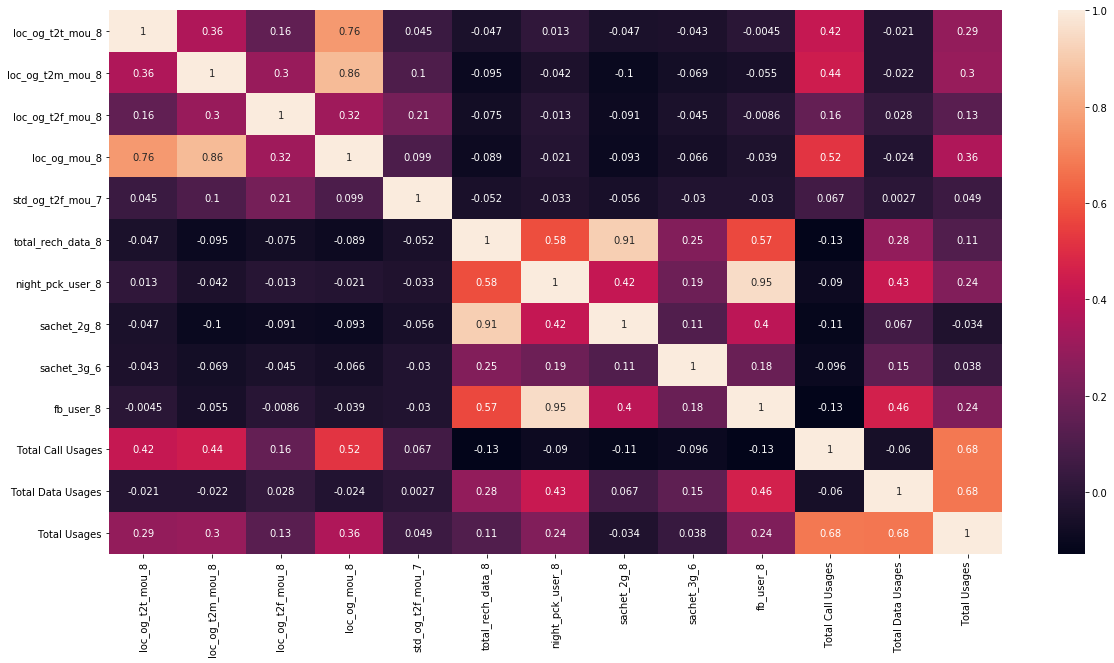

In [352]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[col].corr(),annot = True)
plt.show()



In [353]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [354]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)



1.0

In [355]:
# positive predictive value 
print (TP / float(TP+FP))

0.9973404255319149


In [356]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

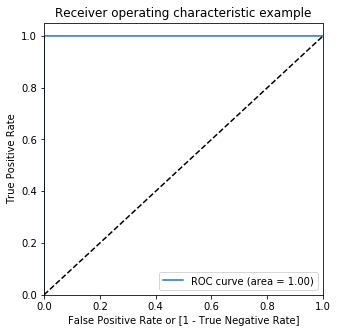

In [357]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

In [360]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Churn, y_pred_final.Churn_Prob))

'1.00'

In [361]:
# create different columns with different probability cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i] = y_pred_final.Churn_Prob.map(lambda x:1 if x>i else 0)
y_pred_final.head()

,Churn,mobile_number,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,20296,0.999059,1,1,1,1,1,1,1,1,1,1,1
1,1,8279,0.999922,1,1,1,1,1,1,1,1,1,1,1
2,0,72269,0.000000,0,0,0,0,0,0,0,0,0,0,0
3,0,65602,0.000000,0,0,0,0,0,0,0,0,0,0,0
4,1,42758,0.996993,1,1,1,1,1,1,1,1,1,1,1


In [362]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.991001  1.000000  0.990183
0.1   0.1  0.999778  1.000000  0.999758
0.2   0.2  0.999778  1.000000  0.999758
0.3   0.3  0.999778  1.000000  0.999758
0.4   0.4  0.999778  1.000000  0.999758
0.5   0.5  0.999778  1.000000  0.999758
0.6   0.6  0.999778  1.000000  0.999758
0.7   0.7  0.999778  1.000000  0.999758
0.8   0.8  0.999778  1.000000  0.999758
0.9   0.9  0.999667  0.998667  0.999758


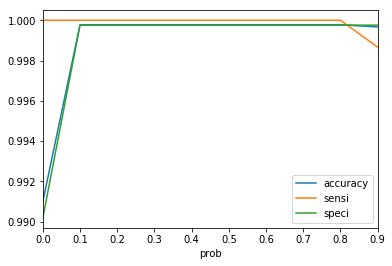

In [363]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [364]:
# from above analysis we can see that 0.8 is the best 
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['PredictedNew'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.8 else 0)
# Let's see the head
y_pred_final.head()

,Churn,mobile_number,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,PredictedNew
0,1,20296,0.999059,1,1,1,1,1,1,1,1,1,1,1,1
1,1,8279,0.999922,1,1,1,1,1,1,1,1,1,1,1,1
2,0,72269,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
3,0,65602,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
4,1,42758,0.996993,1,1,1,1,1,1,1,1,1,1,1,1


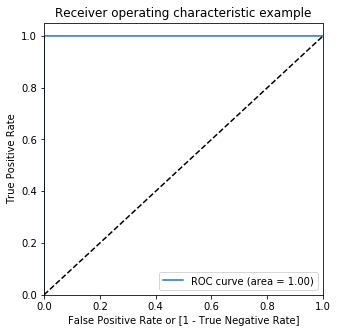

In [365]:
draw_roc(y_pred_final.Churn, y_pred_final.PredictedNew)

In [366]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.PredictedNew )
confusion

array([[8249,    2],
       [   0,  750]])

In [367]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.PredictedNew)

0.9997778024663926

In [368]:
# Recall
# TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

1.0

In [378]:
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

loc_og_t2t_mou_8     -1914447617002.98
loc_og_t2m_mou_8       596215751516.06
loc_og_t2f_mou_8      3061357600972.24
std_og_t2f_mou_7      3628368483153.02
night_pck_user_8     59957763131188.03
sachet_2g_8          19472413879647.45
sachet_3g_6         -32433910087790.70
fb_user_8           -43005130224548.41
Total Call Usages    -1728414133629.17
Total Data Usages     -647637795305.32
dtype: float64

## From above analysis we can see the feature valiables whcich are most important to decide upon the customer churn or not
- loc_og_t2t_mou_8
- loc_og_t2m_mou_8
- loc_og_t2f_mou_8
- std_og_t2f_mou_7
- night_pck_user_8
- sachet_2g_8
- sachet_3g_6
- fb_user_8
- Total Call Usages
- Total Data Usages 